In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regression_utils as ru

from sklearn.linear_model import LinearRegression

In [109]:
dataframe = pd.read_csv("./Data/train.csv")
dataframe = dataframe[['LotFrontage','LotArea', 'SalePrice']].dropna()
dataframe.sample(10)

,LotFrontage,LotArea,SalePrice
832,44.0,9548,237000
235,21.0,1680,89500
1069,60.0,9600,135000
890,60.0,8064,122900
591,97.0,13478,451950
394,60.0,10134,109000
1315,85.0,11075,206900
352,60.0,9084,95000
222,85.0,11475,179900
385,43.0,3182,192000


In [110]:
def reject_outliers(features_table: np.ndarray[np.ndarray], values_to_be_predicted: list, upper_percentile: int, lower_percentile: int, outlierConstant: float) -> (list[list], list):
    columns = len(features_table[0])
    for column in range(columns):
        column_values = [row[column] for _, row in enumerate(features_table)]
        upper_quartile = np.percentile(column_values, upper_percentile)
        lower_quartile = np.percentile(column_values, lower_percentile)
        IQR = (upper_quartile - lower_quartile) * outlierConstant
        low, high = (lower_quartile - IQR, upper_quartile + IQR)

        indices_to_delete = []
        for index, value in enumerate(column_values):
            if not (value >= low and value <= high):
                indices_to_delete.append(index)
        
        features_table = np.delete(features_table, indices_to_delete, 0)
        values_to_be_predicted = np.delete(values_to_be_predicted, indices_to_delete, 0)
        

    return features_table, values_to_be_predicted


In [111]:
np_df = dataframe.to_numpy()
features, expected_predictions = np_df[:, :-1], np_df[:, -1]
features, expected_predictions = np.log2(features), np.log2(expected_predictions)

# Before scaling 

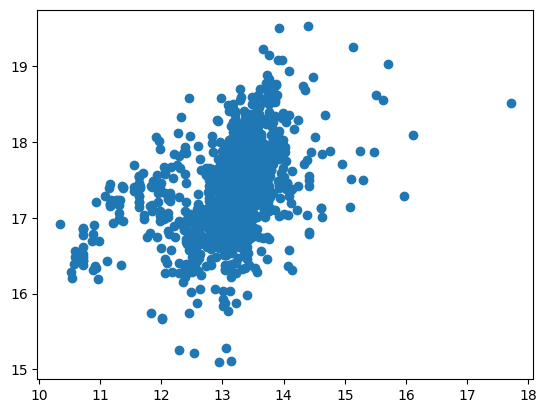

In [112]:
lot_area_values = [feature_list[1] for _, feature_list in enumerate(features)]
plt.scatter(lot_area_values, expected_predictions)

# After scaling

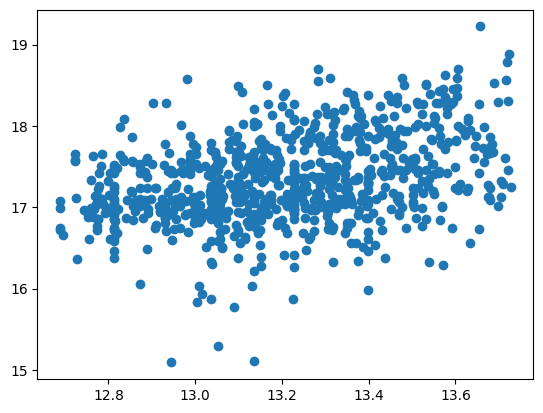

In [113]:
features, expected_predictions = reject_outliers(features, expected_predictions, 65, 35, 1.5)
lot_area_values = [feature_list[1] for _, feature_list in enumerate(features)]
plt.scatter(lot_area_values, expected_predictions)